In [1]:
import pandas as pd
import re

In [2]:
train = pd.read_csv('train.csv').fillna('undef')
test = pd.read_csv('test.csv').fillna('undef')

In [3]:
X = train.drop('label',axis=1)
y = train['label']
messages = X.copy()

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [5]:
from nltk.corpus import stopwords
corpus = []

In [6]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

global final
final = []

def base_mutation(messages):
    corpus = []
    for i in range(messages.shape[0]):
        review = re.sub('[^a-zA-Z]',' ',messages['text'][i]).lower().split()
        corpus.append(review)
    return corpus

def stop_words_filter(corpus, ps):
    for words in corpus:
        val = list(filter(lambda x: True if x not in stopwords.words('english') else False, words))
        final.append(" ".join(val))
    return final, ps

In [7]:
corpus = base_mutation(messages)

In [27]:
corpus, ps = stop_words_filter(corpus, ps)

In [10]:
import pickle
with open("preprocess.txt", "rb") as fp:
    corpus = pickle.load(fp)

In [18]:
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [20]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [22]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [26]:
from sklearn import metrics
import numpy as np
import itertools

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify =y)

accuracy:   0.904
Confusion matrix, without normalization


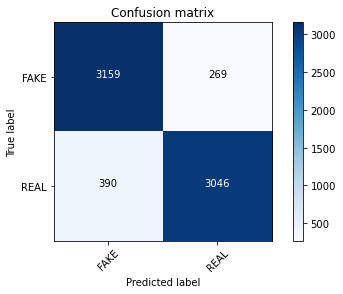

In [29]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [30]:
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9039918414918415

In [33]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.940
Confusion matrix, without normalization


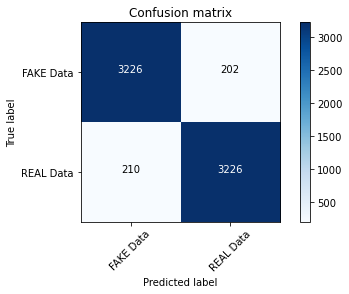

In [34]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [35]:
####

classifier=MultinomialNB(alpha=0.1)

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/Users/sampathroutu/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.905011655011655
Alpha: 0.1, Score : 0.9042832167832168
Alpha: 0.2, Score : 0.9038461538461539
Alpha: 0.30000000000000004, Score : 0.9038461538461539
Alpha: 0.4, Score : 0.9038461538461539
Alpha: 0.5, Score : 0.9039918414918415
Alpha: 0.6000000000000001, Score : 0.9039918414918415
Alpha: 0.7000000000000001, Score : 0.9039918414918415
Alpha: 0.8, Score : 0.9039918414918415
Alpha: 0.9, Score : 0.9039918414918415
